# NLOUnitarity Bounds

In [2]:
import numpy as np

In [7]:
def NLOUnitarityBounds(partialwavematrix, betapartialwavematrix):
    """NLOUnitarityBounds(partialwavematrix, betapartialwavematrix):
Returns a list whose entries are the leading order (LO) and approximate next-to-leading order (NLO) 
contributions to an eigenvalue of the partial wave matrix of a theory whose scalar sector is $\phi^4$-like. 
Please cite arXiv:1502.08511 if you use this notebook.

partialwavematrix: the LO partial wave matrix
betapartialwavemarix: (the 'beta function contribution' to the partial wave matrix this is simply the LO partial wave 
matrix where each quartic couplings is replaced with (-3/2) times its beta function)
"""
    # LO eigenvalues and eigenvectors
    (evals0, evecs0) = np.linalg.eig(partialwavematrix)
    
    # 'sigma terms' of the NLO eigenvalues
    evalssigma = (1j - 1 / np.pi)*evals0**2
    
    # 'beta terms' of the NLO eigenvalues
    # be sure to include the factor of (-3/2) in the definition of betapartialwavematrix
    evalsbeta = [np.dot(evecs0.T[i], np.dot(betapartialwavematrix, evecs0.T[i])) for i in range(len(evecs0))]

    return np.array([evals0, evalssigma + evalsbeta]).T

# Example: 2HDM w/ U(2) symmetry

LO partial wave matrices

In [8]:
def My1s1(l1, l3):
    return -l1*np.identity(3)/(16*np.pi)
def My1s0(l1, l3):
    return -(l1+2*l3)*np.identity(1)/(16*np.pi)
def My0s1(l1, l3):
    return -np.array([[l1, l1-l3, 0, 0],[l1-l3, l1, 0, 0],[0, 0, l3, 0],[0, 0, 0, l3]])/(16*np.pi)
def My0s0(l1, l3):
    return -np.array([[3*l1, l1+l3, 0, 0],[l1+l3, 3*l1, 0, 0],[0, 0, 2*l1-l3, 0],[0, 0, 0, 2*l1-l3]])/(16*np.pi)

Beta Functions

In [9]:
def betafunctions(l1, l3):
    # returns a list with the beta functions for the quartic couplings l1 and l3
    return np.array([14*l1**2 + 2*l3**2, 6*l1**2 + 4*l1*l3 + 6*l3**2])/(16*np.pi**2)

Beta function contributions to the partial wave matrices (w/ factor of -3/2 included)

In [10]:
def bMy1s1(l1, l3):
    return -(3/2)*My1s1(*betafunctions(l1, l3))
def bMy1s0(l1, l3):
    return -(3/2)*My1s0(*betafunctions(l1, l3))
def bMy0s1(l1, l3):
    return -(3/2)*My0s1(*betafunctions(l1, l3))
def bMy0s0(l1, l3):
    return -(3/2)*My0s0(*betafunctions(l1, l3))

# Plot

compare against FIG. 1 (a) of arXiv:1502.08511, which was made entirely using Mathematica.

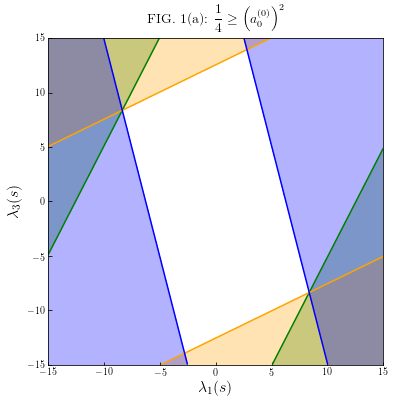

In [190]:
import matplotlib

%matplotlib inline

matplotlib.rc('text', usetex = True)
matplotlib.rc('font', family = 'serif')
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'

delta = 0.3
x = np.arange(-15.0, 15.3, delta)
y = np.arange(-15.0, 15.3, delta)
X, Y = np.meshgrid(x, y)
Z1 = (-(4*X + Y)/(16*np.pi))**2
Z2 = ((X - 2*Y)/(16*np.pi))**2
Z3 = (-(2*X - Y)/(16*np.pi))**2

plt.figure(figsize=(6,6))

plt.contourf(X, Y, Z3, [0.25, 100], colors='green', alpha=0.3)
plt.contourf(X, Y, Z2, [0.25, 100], colors='orange', alpha=0.3)
plt.contourf(X, Y, Z1, [0.25, 100], colors='blue', alpha=0.3)
plt.contour(X, Y, Z3, [0.25], colors='green')
plt.contour(X, Y, Z2, [0.25], colors='orange')
plt.contour(X, Y, Z1, [0.25], colors='blue')

plt.title(r"FIG. 1(a): $\displaystyle\frac{1}{4} \geq \left(a_0^{(0)}\right)^2$", fontsize=14)
plt.xlabel(r"$\displaystyle\lambda_1(s)$", fontsize=16)
plt.ylabel(r"$\displaystyle\lambda_3(s)$", fontsize=16)